Use-case 5 Machine Learning Analysis

Research question: Can we predict the ratings of a show based on the twitter metrics? 

In [112]:
#importing the dataset
import pandas as pd
df_all = pd.read_csv(r"C:/Users/neilr/OneDrive/Documents/BUAS/Year 1/hello_ds/Banijay_EDA/Data/banijay_op1data_content_ratings_twitter.csv")

In [113]:
#checkig if there is any missing values
df_all.isnull().sum()

Unnamed: 0                                   0
Datum                                        0
Time                                         0
Program                                      0
Station                                      0
Target Group                                 0
Broadcast Type                               0
Ratings Type                                 0
Kdh%                                       601
Kdh000                                     601
Zadl%                                    34826
date_time                                    0
unique_date_time                             0
id                                           0
date                                         0
hosts                                        0
length                                       0
start                                        0
end                                          0
title                                        0
summary                                      0
keywords     

In [114]:
#viewing how the dataset looks
df_all.head(3)

,Unnamed: 0,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,...,fragment,just_date,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count
0,0,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitzenddag,9.676969,1546.863437,...,1,2020-01-06,64,109,249,45,337078.0,1432.0,38840.0,2362.0
1,1,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitgesteld,1.484044,237.224411,...,1,2020-01-06,64,109,249,45,337078.0,1432.0,38840.0,2362.0
2,2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,...,1,2020-01-06,64,109,249,45,337078.0,1432.0,38840.0,2362.0


In [115]:
#Changing all the strings to float
df_all["public_metrics.like_count"] = df_all["public_metrics.like_count"].replace(',', '.').astype(float)
df_all["public_metrics.quote_count"] = df_all["public_metrics.quote_count"].replace(',', '.').astype(float)
df_all["public_metrics.reply_count"] = df_all["public_metrics.reply_count"].replace(',', '.').astype(float)
df_all["public_metrics.retweet_count"] = df_all["public_metrics.retweet_count"].replace(',', '.').astype(float)
df_all["Kdh000"] = df_all["Kdh000"].replace(',', '.').astype(float)

c:\Users\neilr\Documents\Anaconda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\neilr\Documents\Anaconda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\neilr\Documents\Anaconda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\neilr\Documents\Anaconda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\neilr\Documents\Anaconda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\neilr\Docum

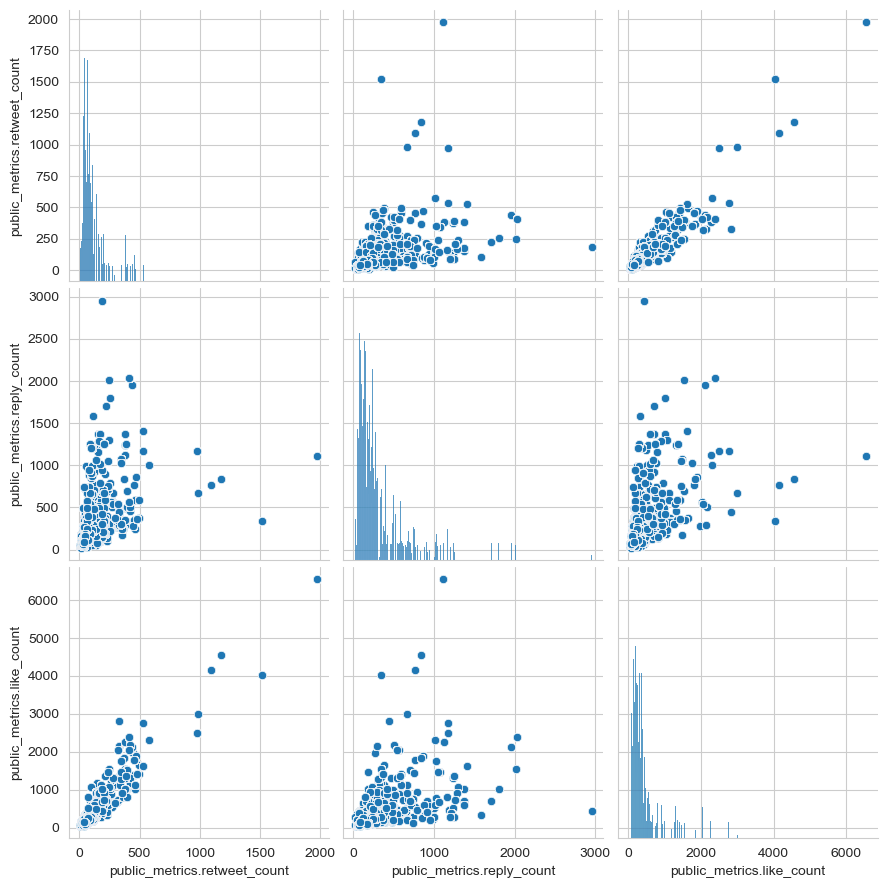

In [116]:
#importing libraries
import matplotlib as plt
import seaborn as sns

#choosing the style of plot: whitegrid
sns.set_style("whitegrid")

#seeing the relationships between numeric variables
sns.pairplot(
    df_all[["public_metrics.retweet_count", "public_metrics.reply_count", "public_metrics.like_count"]],
    height = 3,
    palette = "Set1")

<AxesSubplot:>

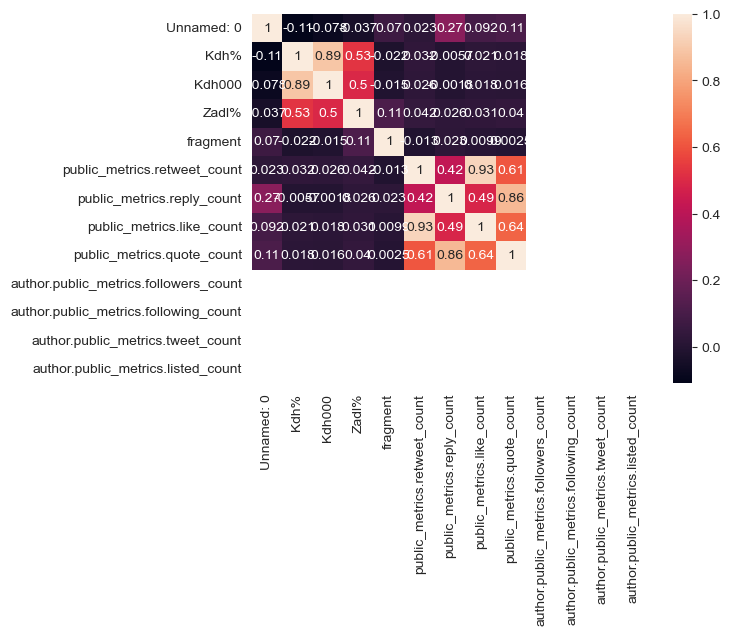

In [117]:
#this visualization checks the correlation between the columns
sns.heatmap(df_all.corr(), annot= True)

In [118]:
#df_all= pd.get_dummies(df_all,columns=["public_metrics.retweet_count", "public_metrics.reply_count", "public_metrics.like_count"])

In [119]:
df_all.dropna(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857644 entries, 0 to 892469
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             857644 non-null  int64  
 1   Datum                                  857644 non-null  object 
 2   Time                                   857644 non-null  object 
 3   Program                                857644 non-null  object 
 4   Station                                857644 non-null  object 
 5   Target Group                           857644 non-null  object 
 6   Broadcast Type                         857644 non-null  object 
 7   Ratings Type                           857644 non-null  object 
 8   Kdh%                                   857644 non-null  float64
 9   Kdh000                                 857644 non-null  float64
 10  Zadl%                                  857644 non-null  

In [120]:
#checking the columns in the dataset
df_all.columns

Index(['Unnamed: 0', 'Datum', 'Time', 'Program', 'Station', 'Target Group',
       'Broadcast Type', 'Ratings Type', 'Kdh%', 'Kdh000', 'Zadl%',
       'date_time', 'unique_date_time', 'id', 'date', 'hosts', 'length',
       'start', 'end', 'title', 'summary', 'keywords', 'date_time_start',
       'date_time_end', 'show_id', 'fragment', 'just_date',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count',
       'author.public_metrics.listed_count'],
      dtype='object')

In [122]:
#importing train_test_split to train and evaluate the data
from sklearn.model_selection import train_test_split

#defining X and Y and seing the shape of X and Y
X = df_all[["public_metrics.retweet_count", "public_metrics.reply_count", "public_metrics.like_count"]]
Y = df_all[["Kdh000"]]
#twitter_metrics.fit(df_all["Kdh000"], twitter_metrics)
(X.shape, Y.shape)

((857644, 3), (857644, 1))

In [123]:
#splitting the dataset into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2, 
    random_state=42)

In [135]:
#importing linear regression class
from sklearn.linear_model import LinearRegression, LogisticRegression

# creating a linear regression class
lr = LinearRegression()
log= LogisticRegression()

#building model using training data
lr.fit(X_train, y_train)

LinearRegression()

In [125]:
# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the test model's performance
testscore = lr.score(X_test,y_test)
print("Test R^2: ", testscore)

# Evaluate the trainings model's performance
trainscore = lr.score(X_train,y_train)
print("Train R^2: ", trainscore)

Test R^2:  0.0008600760166453947
Train R^2:  0.0010843639436458608


Text(0, 0.5, 'Predicted Kdh000')

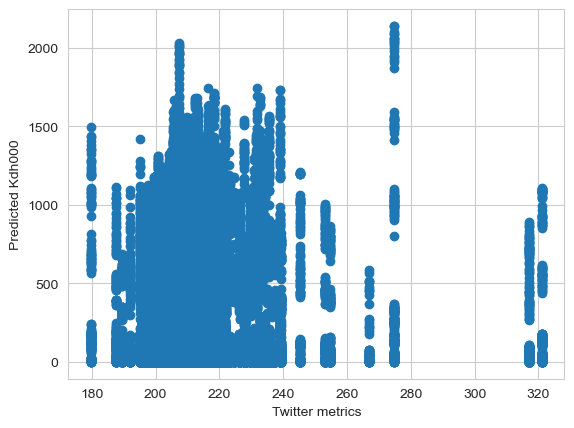

In [126]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_pred, y_test)
plt.xlabel("Twitter metrics")
plt.ylabel("Predicted Kdh000")

In [127]:
#predicting a test data
y_pred = lr.predict(X_test)

#importing the 
from sklearn.metrics import mean_squared_error
import math
#calculating mean_squared error
mse=mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
#calculating the standard deviation
standard_deviation = math.sqrt(mse)
print("Standard deviation:", standard_deviation)

Mean squared error: 90201.59390516437
Standard deviation: 300.335801903743


In [128]:
#selecting the fist row of the training data
data_new = X_train[:1]

#predicting the data with the model
predict= lr.predict(data_new)
predict

array([[207.35932939]])

In [129]:
#checking the real value
y_train[:1]

,Kdh000
809176,0.0


<AxesSubplot:xlabel='public_metrics.retweet_count', ylabel='Kdh000'>

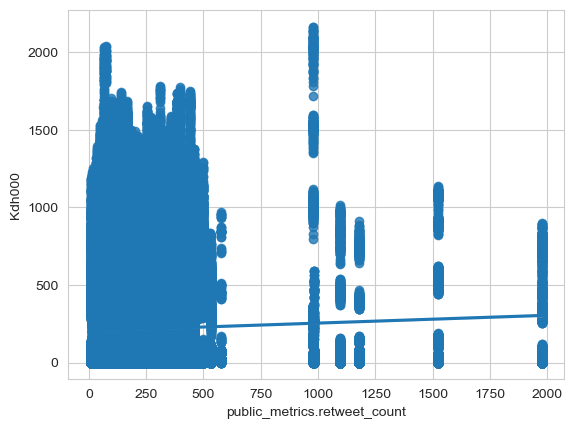

In [130]:
# import library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')

# use the function regplot to make a scatterplot
sns.regplot(x=df_all["public_metrics.retweet_count"], y=df_all["Kdh000"])
#plt.plot(df_all["public_metrics.retweet_count"],y_pred, color="red")

<AxesSubplot:xlabel='public_metrics.reply_count', ylabel='Kdh000'>

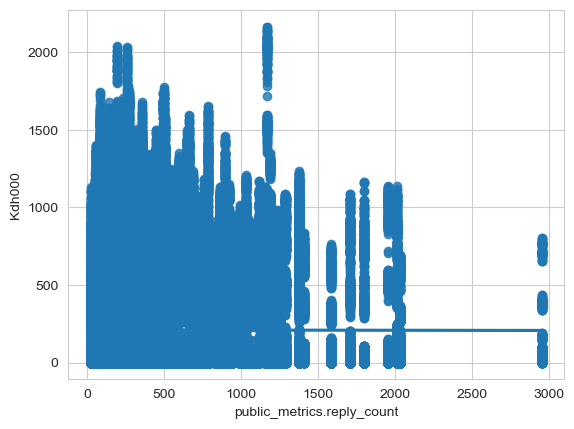

In [131]:
# use the function regplot to make a scatterplot
sns.regplot(x=df_all["public_metrics.reply_count"], y=df_all["Kdh000"])

<AxesSubplot:xlabel='public_metrics.like_count', ylabel='Kdh000'>

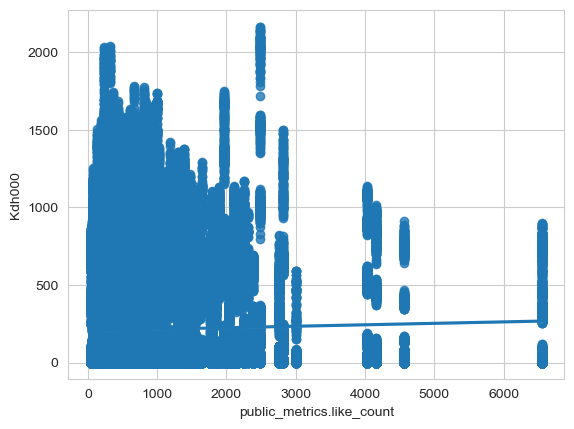

In [132]:
# use the function regplot to make a scatterplot
sns.regplot(x=df_all["public_metrics.like_count"], y=df_all["Kdh000"])